# Проект 2. «РАЗВЕДЫВАТЕЛЬНЫЙ АНАЛИЗ ДАННЫХ (EDA)

# Цели и задачи:


## Цель: Проанализировать данные для подготовки и отбора данных для модели, которая должна повысить уровень благополучия детей по всему миру

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.
Модель, будет предсказывать результаты госэкзамена по математике для каждого ученика школы. Чтобы определиться с параметрами будущей модели, необходимо провести разведывательный анализ данных и составить отчёт по его результатам. 

# Задачи: Обработать, подготовить, осуществить выборку данных для будущей модели.
# План:
## Знакомство с данными
## Предобработка
## Выбросы
## Оценка количества уникальных значений номинативных переменных
## Корреляционный анализ количественных переменных
## Анализ номинативных переменных
## Выводы

In [2]:
from scipy.stats import ttest_ind
from itertools import combinations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок
unisef = pd.read_csv('stud_math.csv')

# Знакомство с данными:

In [3]:
unisef.head(15) #"Визуальное" знакомство с данными

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [4]:
unisef.info() #Знакомство с типами данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

# Предобработка


In [5]:
# выписываем список столбцов с типами int и float для анализа выбросов и корреляции количественных переменных
columns_analysis = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'studytime, granular',
                    'famrel', 'freetime', 'goout', 'health', 'absences', 'score']

# выписываем столбцов с типами int и float для анализа выбросов и корреляции номинативных переменных
columns_nominative = [x for x in unisef.columns if x not in columns_analysis]

# функция для вычисления интерквантильного интервала


def IQR(df, column):
    return df[column].quantile(0.75) - df[column].quantile(0.25)


IQR(unisef, 'age')
(unisef.age > (unisef.age.quantile(0.75)+1.5*IQR(unisef, 'age'))).unique()

# вычисляем количество выбросов


def emissions_analysis(df):
    for column in columns_analysis:
        IQR(unisef, column)
        more_emissions = (df[column] > (df[column].quantile(
            0.75) + 1.5*IQR(df, column))).nunique()
        less_emissions = (df[column] < (df[column].quantile(
            0.25) - 1.5*IQR(df, column))).nunique()
        print('Количество выбросов в столбце {} = {},'.format(
            column, more_emissions+less_emissions))

# избавление от значений NaN


def no_NaN(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            mode = df[column].mode()[0]
            df[column] = df[column].apply(
                lambda x: mode if type(x) == float else x)
        else:
            median = round(df[column].median())
            df[column] = df[column].apply(
                lambda x: median if np.isnan(x) else x)

Избавимся от значений NaN(Как видно выше, нулевых значений не так много, но и удалять все строки, где единожды есть значение NaN - нецелесообразно). Поэтому для данных типа object, мы заменим NaN на значение моды. Для всех других типов данных - значение медианы.

In [6]:
no_NaN(unisef)

In [7]:
if True in unisef.isna():
    print('Что-то пошло не так')
else:
    print('Нулевых значений не осталось!')

Нулевых значений не осталось!


# Выбросы

In [8]:
emissions_analysis(unisef) # применяем функцию для вычисления количества выбросов для каждой количественной переменной

Количество выбросов в столбце age = 3,
Количество выбросов в столбце Medu = 2,
Количество выбросов в столбце Fedu = 4,
Количество выбросов в столбце traveltime = 3,
Количество выбросов в столбце studytime = 3,
Количество выбросов в столбце failures = 3,
Количество выбросов в столбце studytime, granular = 3,
Количество выбросов в столбце famrel = 3,
Количество выбросов в столбце freetime = 3,
Количество выбросов в столбце goout = 2,
Количество выбросов в столбце health = 2,
Количество выбросов в столбце absences = 3,
Количество выбросов в столбце score = 2,


### Рассмотрим каждый столбец по отдельности:

## age

In [9]:
unisef['age'].describe()

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

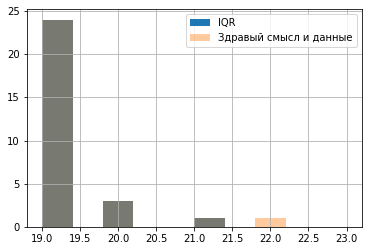

In [10]:
# рассмотрим ту часть гистограммы, где предполагаемый выброс хорошо виден
unisef.age.loc[unisef.age.between(
    unisef.age.quantile(0.25) - 1.5*IQR(unisef, 'age'),
    unisef.age.quantile(0.75) + 1.5*IQR(unisef, 'age'))].hist(bins=10, range=(19, 23), label='IQR')

unisef.age.hist(alpha=0.4, bins=10, range=(
    19, 23), label='Здравый смысл и данные')

plt.legend()

Здравый смысл говорит о том, что в выбросы попадают реальные значения, так как в условии задачи возраст учащихся как раз 15-22 года(от значения min до max). Игнорируем данные о выбросах с методом IQR

## Medu, Fedu

In [11]:
unisef['Medu'].describe()

count    395.000000
mean       2.751899
std        1.094154
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

Выбросов нет(согласно здравому смыслу)

In [12]:
unisef['Fedu'].describe()

count    395.000000
mean       2.577215
std        2.164782
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

Значение "40" - аномально, смотрим распределение признака на графике:

C:\Users\manniedavis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fedu', ylabel='Density'>

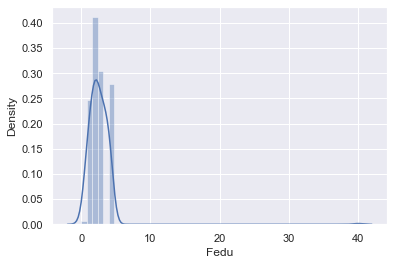

In [13]:
sns.set()
sns.distplot(unisef['Fedu'])

В Fedu избавляемся от выбросов:

In [14]:
more_emissions = (unisef['Fedu'] > (
    unisef['Fedu'].quantile(0.75) + 1.5*IQR(unisef, 'Fedu')))
less_emissions = (unisef['Fedu'] < (
    unisef['Fedu'].quantile(0.25) - 1.5*IQR(unisef, 'Fedu')))

In [15]:
unisef.loc[((more_emissions) | (less_emissions)),
           ('Fedu')] = unisef.Fedu.median()

In [16]:
unisef.Fedu.max()

4.0

## traveltime

In [17]:
unisef['traveltime'].describe()

count    395.000000
mean       1.407595
std        0.678490
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

Выбросов нет(согласно условию задачи и здравому смыслу)

## studytime

In [18]:
unisef['studytime'].describe()

count    395.000000
mean       2.037975
std        0.834580
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

Выбросов нет(согласно условию задачи и здравому смыслу)

## failures

In [19]:
unisef['failures'].describe()

count    395.000000
mean       0.318987
std        0.726244
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

Посмотрим на распределение признака, так как данные по квартилям неоднозначные.

<AxesSubplot:ylabel='Frequency'>

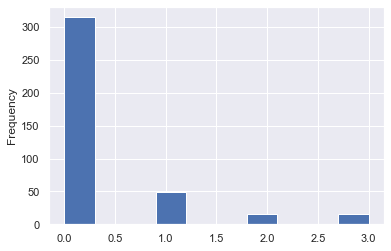

In [20]:
unisef['failures'].plot(kind='hist', grid=True)

Необходимо учитывать то, что данный признак специфический. Он отражает только неудачи, не связанные с учебой. Если мысленно прибавить внеучебные "удачи", то распределение признака будет выглядеть нормально.Выбросов нет(согласно условию задачи и здравому смыслу)

## studytime, granular

In [21]:
unisef['studytime, granular'].describe()

count    395.000000
mean      -6.113924
std        2.503740
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64

Выбросов нет(согласно условию задачи и здравому смыслу)

## famrel

In [22]:
unisef['famrel'].describe()

count    395.000000
mean       3.941772
std        0.895081
min       -1.000000
25%        4.000000
50%        4.000000
75%        4.500000
max        5.000000
Name: famrel, dtype: float64

В famrel есть выбросы.Избавляемся от них:

In [23]:
less_emissions = (unisef['famrel'] < (
    unisef['famrel'].quantile(0.25) - 1.5*IQR(unisef, 'famrel')))

In [24]:
unisef.loc[(less_emissions), ('famrel')] = unisef.famrel.median()

In [25]:
unisef.famrel.describe()

count    395.000000
mean       4.250633
std        0.433927
min        4.000000
25%        4.000000
50%        4.000000
75%        4.500000
max        5.000000
Name: famrel, dtype: float64

## freetime

In [26]:
unisef['freetime'].describe()

count    395.000000
mean       3.225316
std        0.980711
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

Выбросов нет(согласно условию задачи и здравому смыслу)

## goout

In [27]:
unisef['goout'].describe()

count    395.000000
mean       3.103797
std        1.104610
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

Выбросов нет(согласно условию задачи и здравому смыслу)

## health

In [28]:
unisef['goout'].describe()

count    395.000000
mean       3.103797
std        1.104610
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

Выбросов нет(согласно условию задачи и здравому смыслу)

## absences

In [29]:
unisef.absences.describe()

count    395.000000
mean       7.179747
std       23.111967
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

В absences есть выбросы.Избавляемся от них:

In [30]:
more_emissions = (unisef['absences'] > (
    unisef['absences'].quantile(0.75) + 1.5*IQR(unisef, 'absences')))
less_emissions = (unisef['absences'] < (
    unisef['absences'].quantile(0.25) - 1.5*IQR(unisef, 'absences')))

In [31]:
unisef.loc[(more_emissions), ('absences')] = unisef.absences.median()

## score

In [32]:
unisef['score'].describe()

count    395.000000
mean      52.303797
std       22.746314
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

Посмотрим на распределение признака:

<AxesSubplot:ylabel='Frequency'>

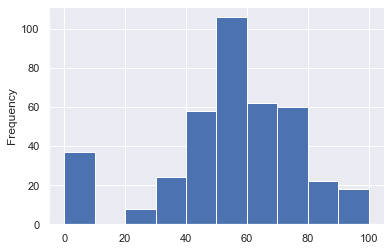

In [33]:
unisef['score'].plot(kind='hist', grid = True)

Значение 0 может быть выбросом, но необязательно. Мы точно не знаем, что отражает это нулевое значение: испорченный бланк теста, несдача теста по уважительным причинам, сбой системы и т.д. По этой логике оставляем 0. Следовательно, выбросов нет(согласно условию задачи и здравому смыслу, что результат теста - от 0 до 100)

# Оценка количества уникальных значений номинативных переменных

In [34]:
for column in columns_nominative:
    print('Количество уникальных значений в столбце {} : {}'.format(
        column, unisef[column].nunique()))

Количество уникальных значений в столбце school : 2
Количество уникальных значений в столбце sex : 2
Количество уникальных значений в столбце address : 2
Количество уникальных значений в столбце famsize : 2
Количество уникальных значений в столбце Pstatus : 2
Количество уникальных значений в столбце Mjob : 5
Количество уникальных значений в столбце Fjob : 5
Количество уникальных значений в столбце reason : 4
Количество уникальных значений в столбце guardian : 3
Количество уникальных значений в столбце schoolsup : 2
Количество уникальных значений в столбце famsup : 2
Количество уникальных значений в столбце paid : 2
Количество уникальных значений в столбце activities : 2
Количество уникальных значений в столбце nursery : 2
Количество уникальных значений в столбце higher : 2
Количество уникальных значений в столбце internet : 2
Количество уникальных значений в столбце romantic : 2


Очевидно, уникальных значений немного. Выборка наиболее значимых значений для анализа не требуется.

# Корреляционный анализ количественных переменных

In [35]:
unisef.corr(method='spearman')  # используем коэффициент Спирмена

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.158701,-0.142174,0.120110,0.019468,0.223336,-0.019468,0.006102,0.005330,0.147807,-0.078905,0.113633,-0.160857
Medu,-0.158701,1.000000,0.608674,-0.131740,0.077645,-0.245182,-0.077645,0.027966,0.028027,0.064295,-0.035691,0.070319,0.213474
Fedu,-0.142174,0.608674,1.000000,-0.111266,0.036894,-0.249304,-0.036894,-0.018899,-0.024813,0.047254,-0.001841,-0.008197,0.144784
traveltime,0.120110,-0.131740,-0.111266,1.000000,-0.097517,0.034541,0.097517,-0.058283,-0.023433,0.031145,-0.073068,-0.034693,-0.066065
studytime,0.019468,0.077645,0.036894,-0.097517,1.000000,-0.152316,-1.000000,0.021501,-0.105466,-0.052064,-0.093458,-0.039911,0.122008
failures,0.223336,-0.245182,-0.249304,0.034541,-0.152316,1.000000,0.152316,-0.034004,0.096067,0.099077,0.099054,0.073210,-0.337977
"studytime, granular",-0.019468,-0.077645,-0.036894,0.097517,-1.000000,0.152316,1.000000,-0.021501,0.105466,0.052064,0.093458,0.039911,-0.122008
famrel,0.006102,0.027966,-0.018899,-0.058283,0.021501,-0.034004,-0.021501,1.000000,0.092988,0.038595,-0.001033,-0.027959,0.082551
freetime,0.005330,0.028027,-0.024813,-0.023433,-0.105466,0.096067,0.105466,0.092988,1.000000,0.292136,0.076110,0.054770,0.002804
goout,0.147807,0.064295,0.047254,0.031145,-0.052064,0.099077,0.052064,0.038595,0.292136,1.000000,-0.023207,0.134237,-0.157962


Избавляемся от переменной studytime, granular так как она полностью скоррелирована со studytime.
Оставляем studytime, Medu, Fedu, goout, failures. Признак age не попадет в дальнейший анализ, так как возраст в исследовании - скорее справочная информация.

# Анализ номинативных переменных

In [36]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(10, 4))
    sns.boxplot(x=column, y='score',
                data=unisef, ax=ax)
    ax.set_title('Boxplot for ' + column)
    plt.show()

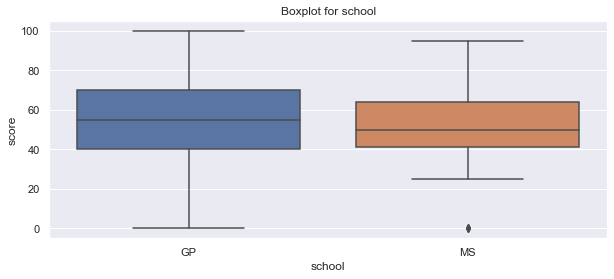

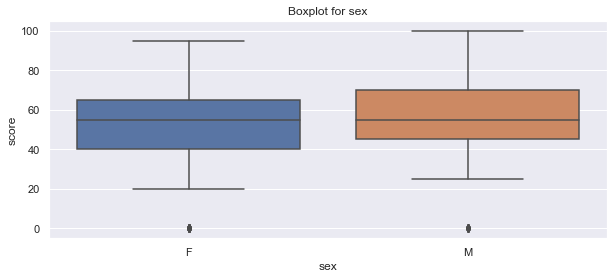

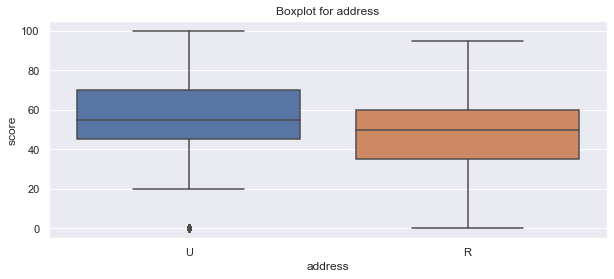

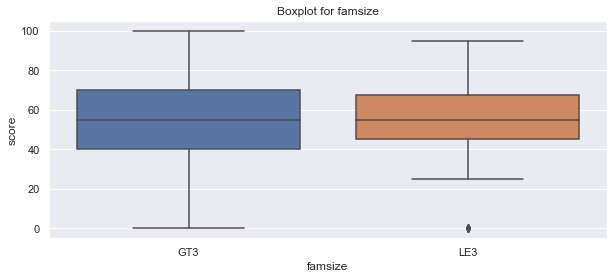

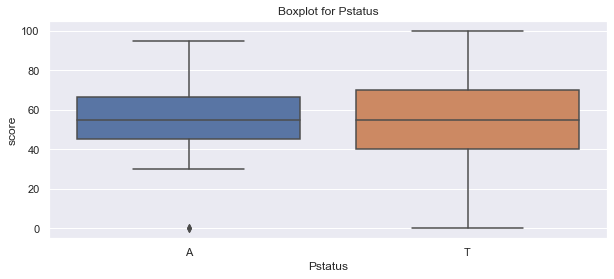

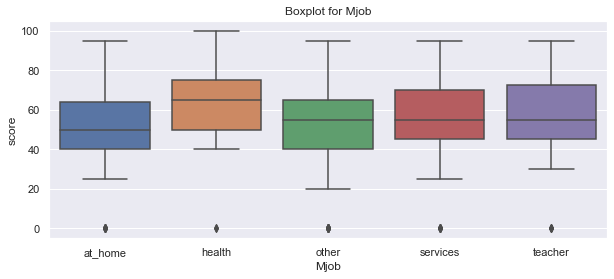

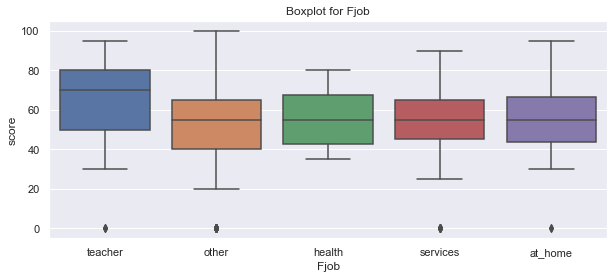

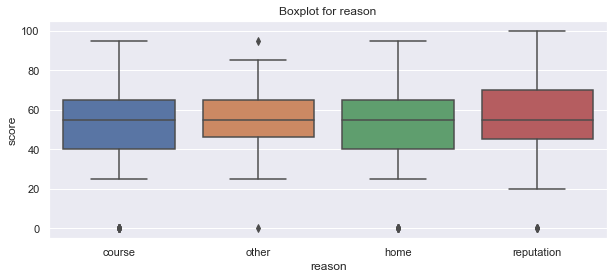

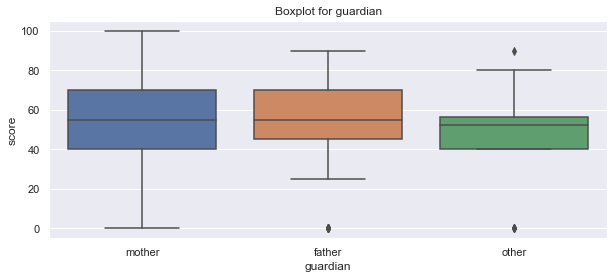

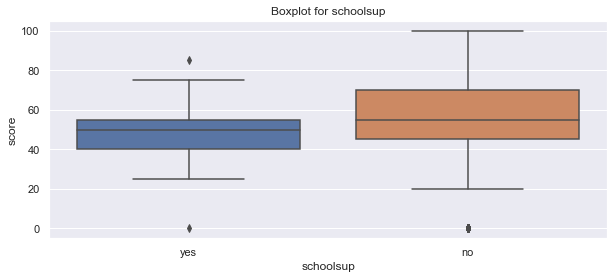

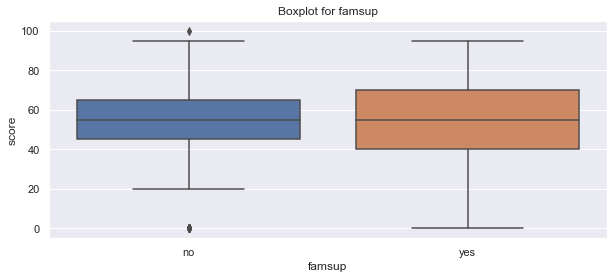

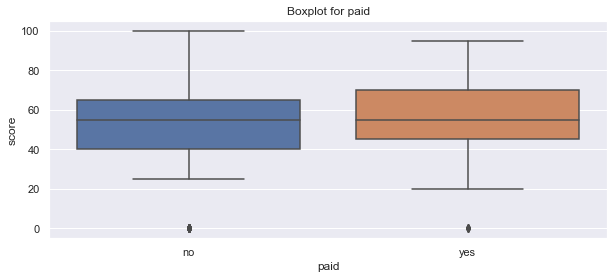

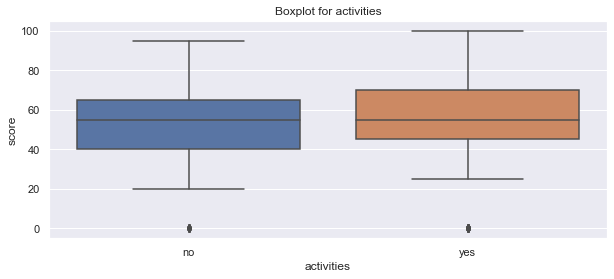

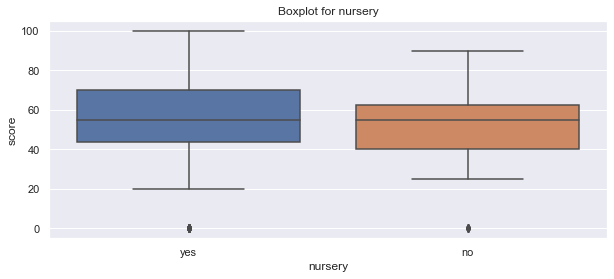

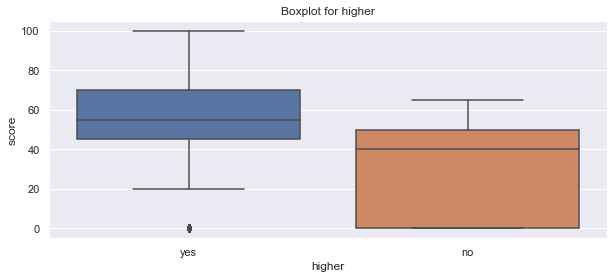

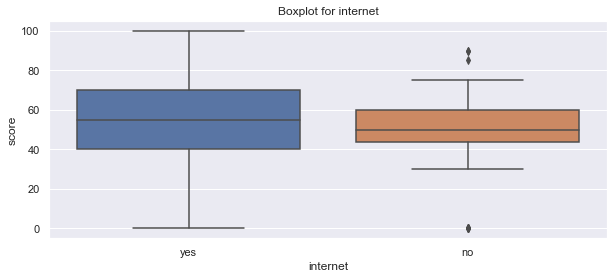

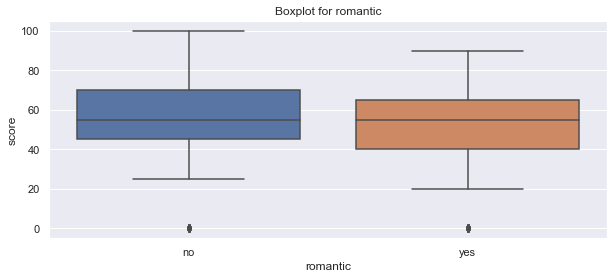

In [37]:
for col in columns_nominative:
    get_boxplot(col)

Рассмотрим какие номинативные переменные могут влиять на результат экзамена:

school Не влияет

sex Влияет

address Влияет

famsize Не влияет

Pstatus Не влияет

Mjob Влияет

Fjob Влияет

reason Не влияет

guardian Не влияет

schoolsup Влияет

famsup Не влияет

paid Влияет

activities Влияет

nursery Не влияет

higher Влияет

internet Влияет

romantic Влияет

# Выводы

In [38]:
unisef_for_model = unisef.loc[:, ['studytime', 'Medu', 'Fedu', 'goout', 'failures', 'sex', 'address',
                                  'Mjob', 'Fjob', 'schoolsup', 'paid', 'activities', 'higher', 'internet', 'romantic']]
unisef_for_model.head(20)

,studytime,Medu,Fedu,goout,failures,sex,address,Mjob,Fjob,schoolsup,paid,activities,higher,internet,romantic
0,2.0,4.0,4.0,4.0,0.0,F,U,at_home,teacher,yes,no,no,yes,yes,no
1,2.0,1.0,1.0,3.0,0.0,F,U,at_home,other,no,no,no,yes,yes,no
2,2.0,1.0,1.0,2.0,3.0,F,U,at_home,other,yes,no,no,yes,yes,no
3,3.0,4.0,2.0,2.0,0.0,F,U,health,other,no,yes,yes,yes,yes,yes
4,2.0,3.0,3.0,2.0,0.0,F,U,other,other,no,yes,no,yes,no,no
5,2.0,4.0,3.0,2.0,0.0,M,U,services,other,no,yes,yes,yes,yes,no
6,2.0,2.0,2.0,4.0,0.0,M,U,other,other,no,no,no,yes,yes,no
7,2.0,4.0,4.0,4.0,0.0,F,U,other,teacher,yes,no,no,yes,no,no
8,2.0,3.0,2.0,2.0,0.0,M,U,services,other,no,yes,no,yes,yes,no
9,2.0,3.0,4.0,1.0,0.0,M,U,other,other,no,yes,yes,yes,yes,no


## Отбираем для модели 15 признаков из 30.
На результат экзамена, согласно анализу сильно влияют потрясения, не связанные с учебной деятельностью(failure), 
в семьях где мать - врач, а отец - учитель вероятность успешной сдачи экзамена выше.
По половому признаку есть различия(sex), а также есть отрицательное влияние "встреч с друзьями"(goout) и положительно-желание обучаться в высшем учебном заведении(higher), платные занятия(paid).
В целом, согласно анализу, каждый из признаков так или иначе влияет на успешную сдачу экзамена(score)